# **Introduction**
Diabetes adalah penyakit kronis yang terjadi ketika pankreas tidak menghasilkan cukup insulin atau ketika tubuh tidak dapat menggunakan insulin yang diproduksi secara efektif. Tujuan dari penelitian ini adalah Tujuan penelitian ini adalah **untuk mengidentifikasi model terbaik untuk mengklasifikasikan apakah pasien wanita menderita diabetes**. Dataset dari National Institute of Diabetes and Digestive and Kidney Diseases akan digunakan.

Dataset terdiri dari 9 variabel:

* **Pregnancies**: Berapa kali hamil
* **Glucose**: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
* **BloodPressure**: Tekanan darah diastolik (mm Hg)
* **SkinThickness**: Ketebalan lipatan kulit trisep (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2)
* **DiabetesPedigreeFunction**: Fungsi silsilah diabetes
* **Age**: Umur (tahun)
* **Outcome**: Variabel kelas (0 atau 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.info()
diabetes.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

* Dataset terdiri dari 768 observasi.

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Exploratory Data Analysis**

In [5]:
# To check the entries for each variable
for col in diabetes.columns: 
  print('{} : {}'.format(col, diabetes[col].unique()))

Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


Nilai **Glucose, Blood Pressure, Skin Thickness, Insulin and BMI** tidak mungkin 0. Oleh karena itu, nilai 0 akan dikoreksi menjadi NAN.

In [6]:
# Untuk mengoreksi nilai 0 ke NAN
replace_value = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in replace_value:
    diabetes[col].replace({0 : np.nan}, inplace=True)

,Column,Missing_Count,Percentage(%)
0,Pregnancies,0,0.00
1,Glucose,5,0.65
2,BloodPressure,35,4.56
3,SkinThickness,227,29.56
4,Insulin,374,48.70
5,BMI,11,1.43
6,DiabetesPedigreeFunction,0,0.00
7,Age,0,0.00
8,Outcome,0,0.00


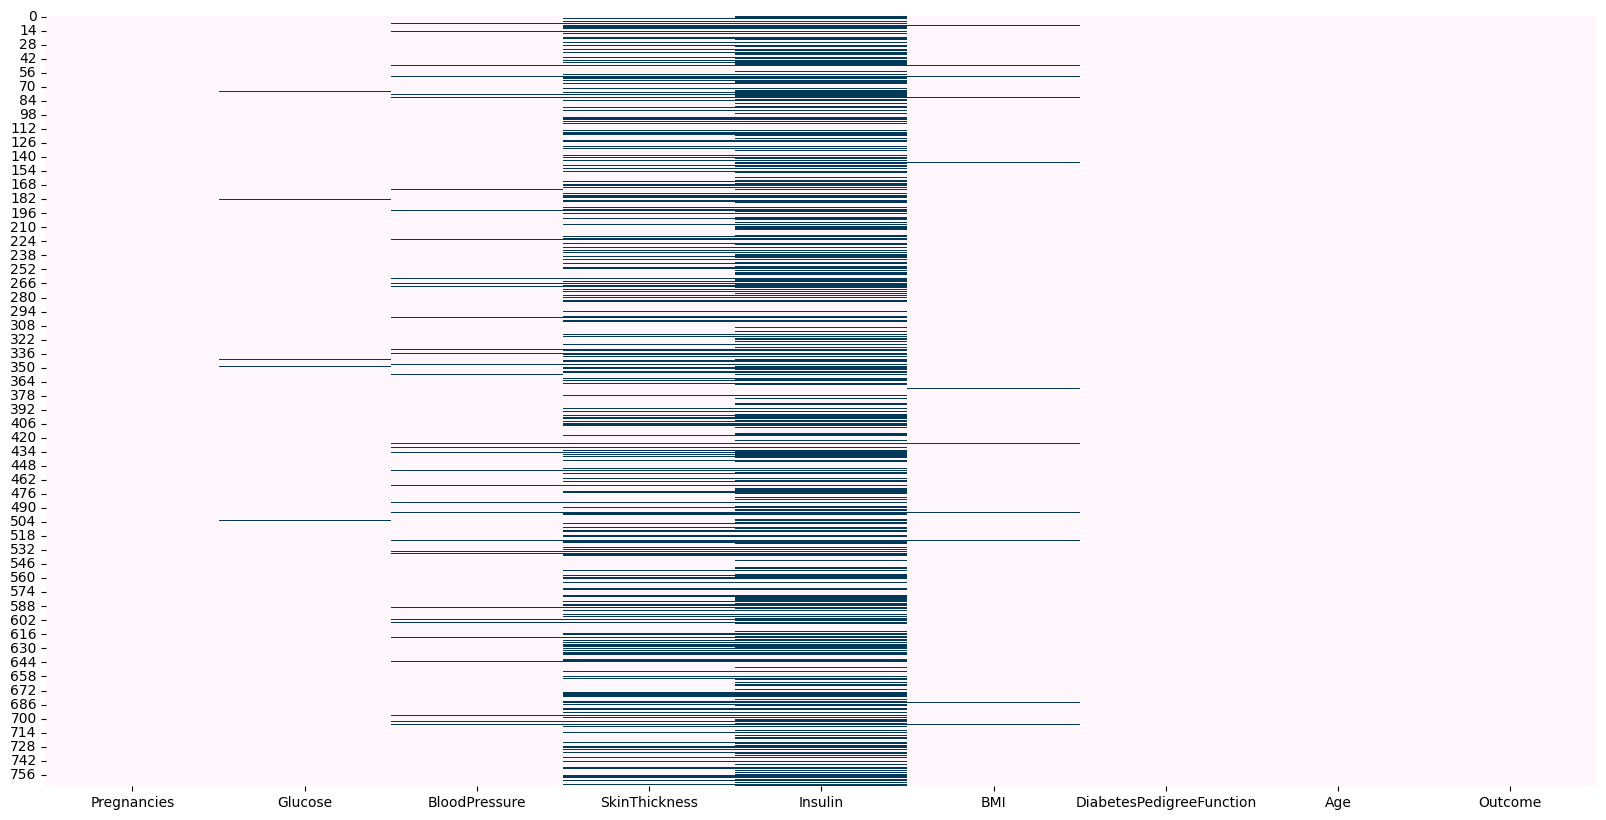

In [7]:
# Untuk memvisualisasikan nilai / NAN yang hilang
plt.figure(figsize=(20,10))
sns.heatmap(diabetes.isnull(), cbar=False, cmap=plt.cm.PuBu)

# Untuk mengecek persentase missing value / NAN
df = pd.DataFrame()
df['Column'] = diabetes.columns
df['Missing_Count'] = [diabetes[col].isnull().sum() for col in diabetes.columns]
df['Percentage(%)'] = [round((diabetes[col].isnull().sum() / diabetes.shape[0])*100, 2) for col in diabetes.columns]

df

Tidak ada variabel yang dijatuhkan berdasarkan hasil yang ditunjukkan di atas. Hal ini karena sebagai aturan umum, suatu variabel harus dibuang jika 60-70% datanya hilang. Imputasi akan digunakan untuk menangani nilai yang hilang.

<Figure size 640x480 with 0 Axes>

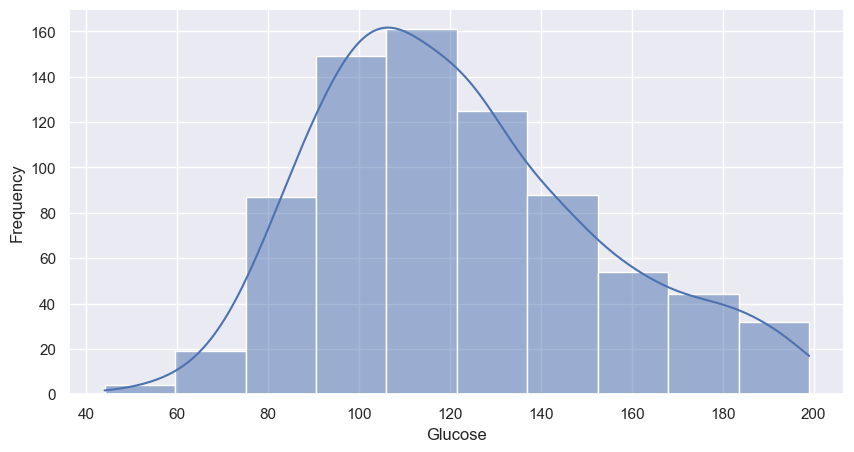

<Figure size 1000x500 with 0 Axes>

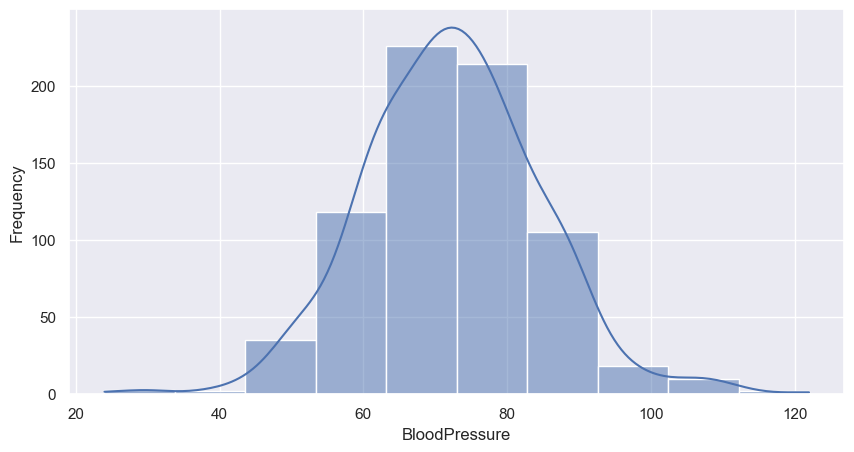

<Figure size 1000x500 with 0 Axes>

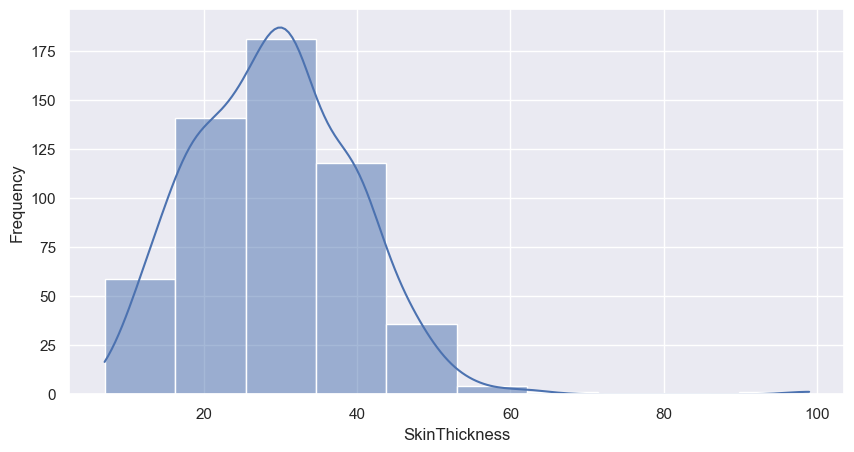

<Figure size 1000x500 with 0 Axes>

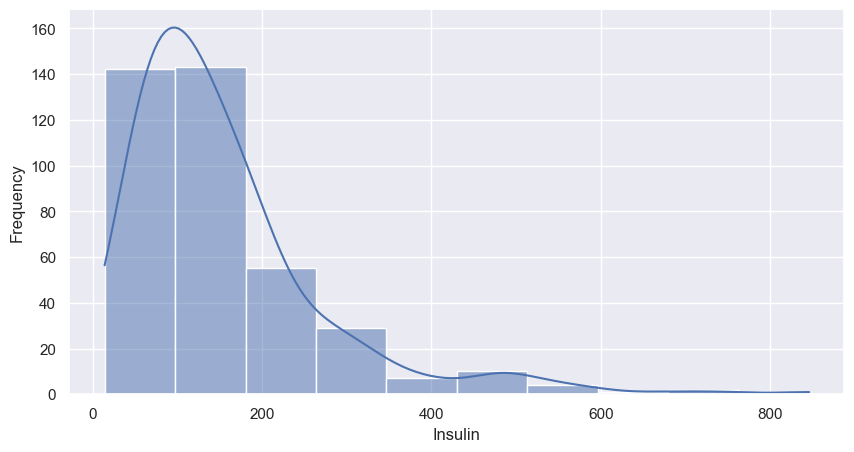

<Figure size 1000x500 with 0 Axes>

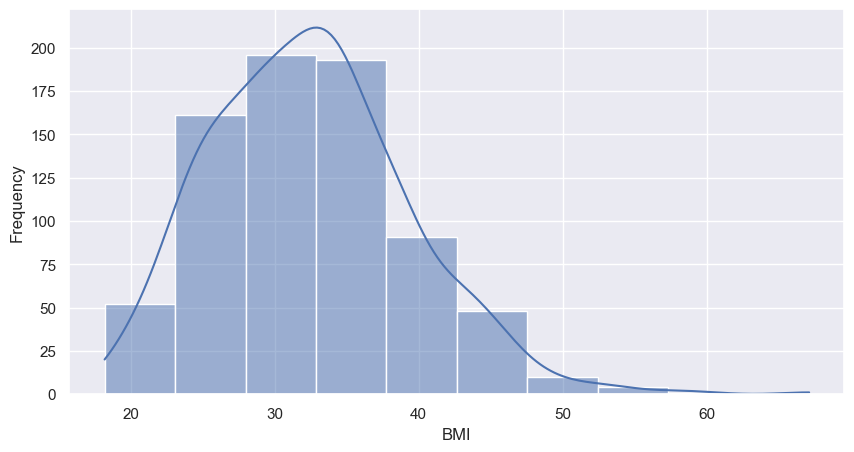

In [8]:
# Untuk memvisualisasikan distribusi data untuk variabel dengan nilai yang hilang
for col in replace_value:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={'figure.figsize': (10,5)})

    f, ax = plt.subplots()
    plt.gca().set(xlabel=col, ylabel='Frequency')
    sns.histplot(diabetes[col], bins=10, kde=True)

Karena data **Glucose, Skin Thickness, Insulin and BMI** tidak berdistribusi normal seperti yang ditunjukkan diatas, median akan digunakan untuk menghitung nilai yang hilang. Namun, tekanan darah mengikuti distribusi normal dan rata-rata akan digunakan untuk menghitung nilai yang hilang.

In [9]:
# Untuk menghitung nilai yang hilang dengan median
replace_median = ['Glucose', 'SkinThickness', 'Insulin', 'BMI']
for col in replace_median:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())

# Untuk menghubungkan nilai yang hilang dengan rata-rata
diabetes['BloodPressure'] = diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean())

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
# Untuk mendapatkan statistik deskriptif
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:ylabel='count'>

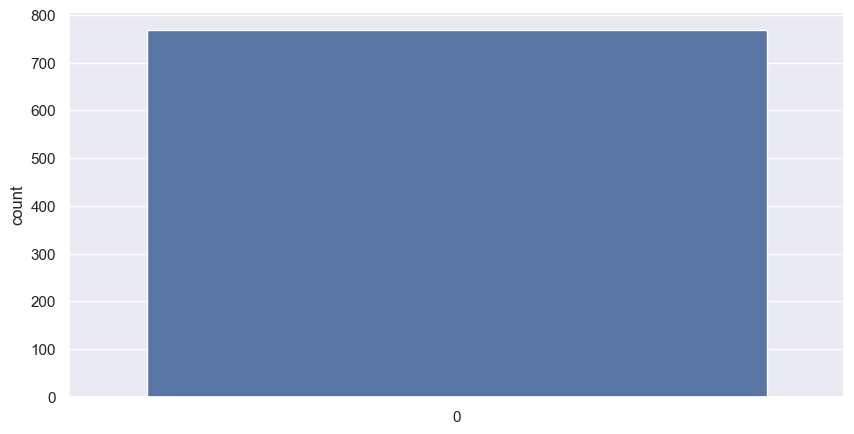

In [11]:
print(diabetes['Outcome'].value_counts())

# Untuk memvisualisasikan jumlah Hasil
plt.figure(figsize=(10,5))
sns.countplot(diabetes['Outcome'])

Dari hasil di atas, jumlah pasien non-diabetes jauh lebih banyak daripada pasien diabetes, yang menunjukkan bahwa datanya tidak seimbang.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

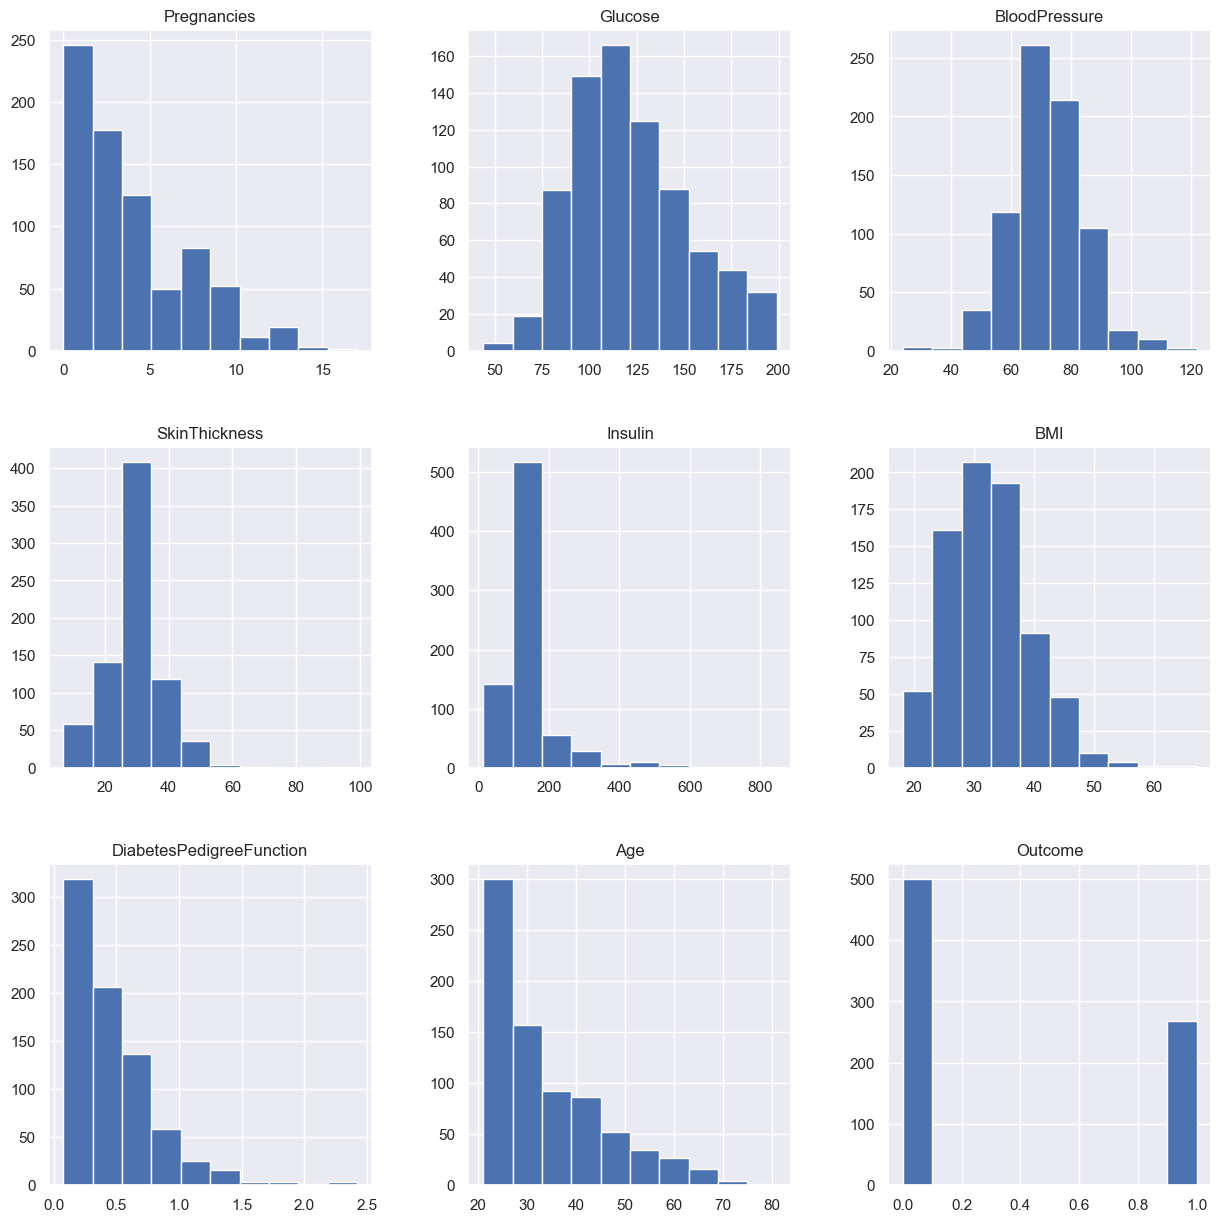

In [12]:
diabetes.hist(bins=10,figsize=(15,15))

Menurut hasil di atas, semua variabel miring, kecuali **BloodPressure** yang berdistribusi normal.

Text(0.5, 1.0, 'Correlation')

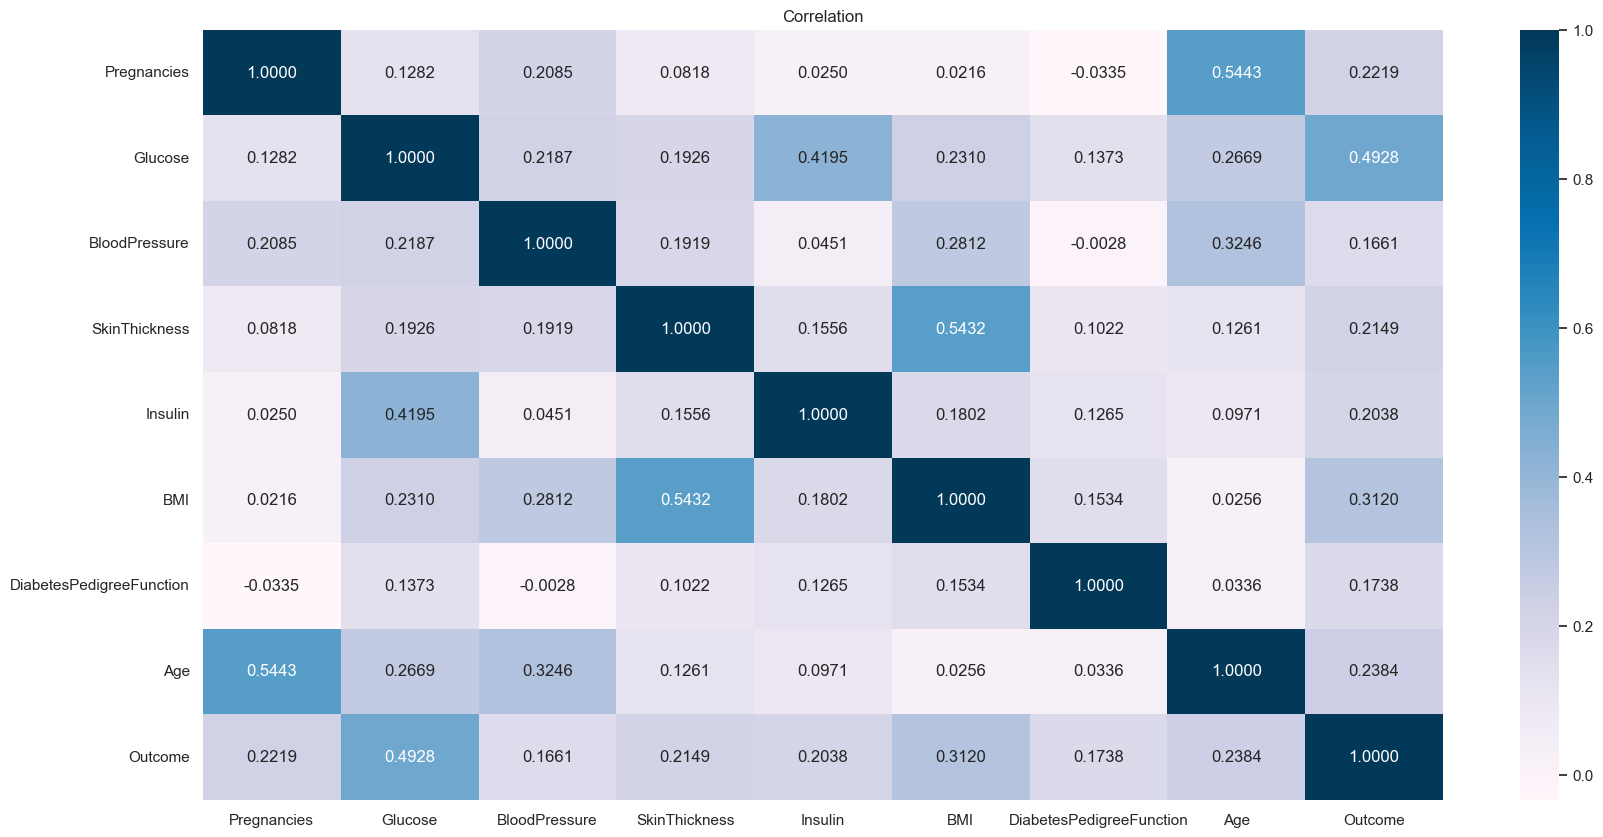

In [13]:
# Untuk menilai hubungan antara variabel
plt.figure(figsize=(20,10))
sns.heatmap(diabetes.corr(), cbar=True, fmt='.4f', annot=True, cmap=plt.cm.PuBu)
plt.title('Correlation')

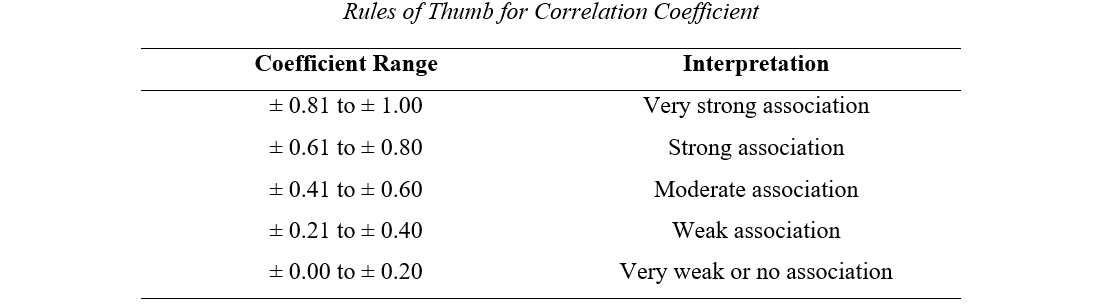

Berdasarkan output di atas, **Glucose** dan Hasil memiliki hubungan positif yang cukup kuat. Sedangkan **BMI, Pregnancies, Age, Skin Thickness dan Insulin** memiliki hubungan positif yang lemah dengan Outcome.

# **Feature Selection**

Saling informasi akan digunakan untuk mengukur ketergantungan antar variabel.

Glucose                     0.132128
BMI                         0.070622
Age                         0.046833
Insulin                     0.034658
Pregnancies                 0.033064
DiabetesPedigreeFunction    0.010656
BloodPressure               0.003267
SkinThickness               0.000000
Name: Mutual Information Scores, dtype: float64

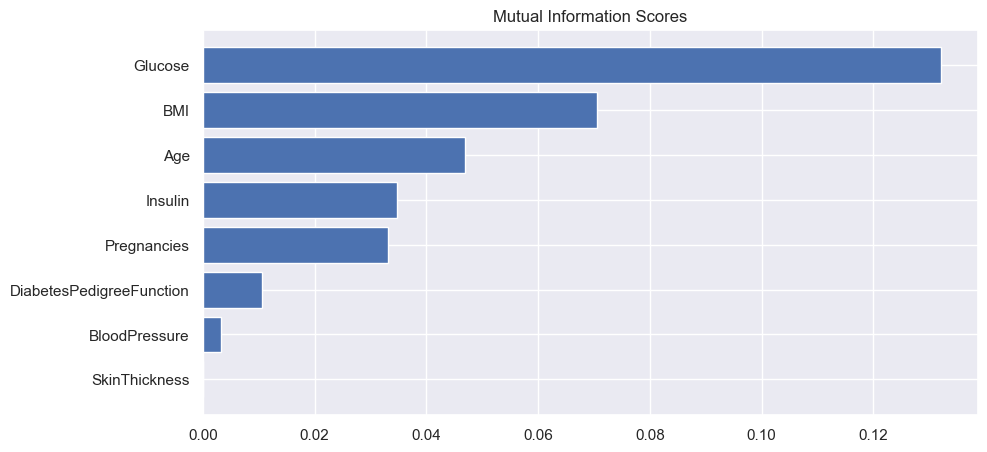

In [14]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_classif(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name='Mutual Information Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return(mi_scores)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')


# Define X and y
X = diabetes.copy()
y = X.pop('Outcome')


mi_scores = make_mi_scores(X, y)
display(mi_scores)
plot_mi_scores(mi_scores)

Berdasarkan output di atas, skor MI untuk Ketebalan Kulit (SkinThickness) adalah 0, yang menunjukkan bahwa variabel dan Outcome bersifat independen (Tidak ada aliran informasi). Oleh karena itu, Ketebalan Kulit (SkinThickness) tidak dipilih sebagai fitur.

In [15]:
# Untuk mengurangi variabel masukan
X.drop(['SkinThickness'], axis=1, inplace=True)

X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,125.0,33.6,0.627,50
1,1,85.0,66.0,125.0,26.6,0.351,31
2,8,183.0,64.0,125.0,23.3,0.672,32
3,1,89.0,66.0,94.0,28.1,0.167,21
4,0,137.0,40.0,168.0,43.1,2.288,33


# **Classification Model**

Metode klasifikasi biner Random Forest akan digunakan karena Outcome mencakup dua kelompok (diabetes & non-diabetes).

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75, random_state=0)

# To standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [19]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# **Model Evaluation**

c:\Users\siska\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Accuracy,Precision,Recall,F1
Logistic Regression,0.755208,0.537313,0.692308,0.605042
Support Vector Machines,0.755208,0.537313,0.692308,0.605042
Decision Trees,0.713542,0.552239,0.596774,0.573643
Random Forest,0.770833,0.597015,0.701754,0.645161
Naive Bayes,0.765625,0.611940,0.683333,0.645669
K-Nearest Neighbor,0.723958,0.507463,0.629630,0.561983


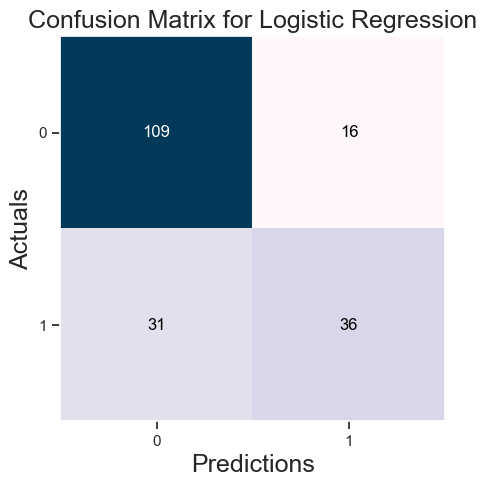

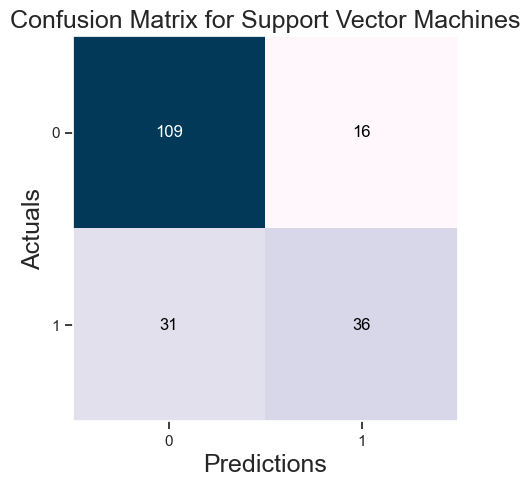

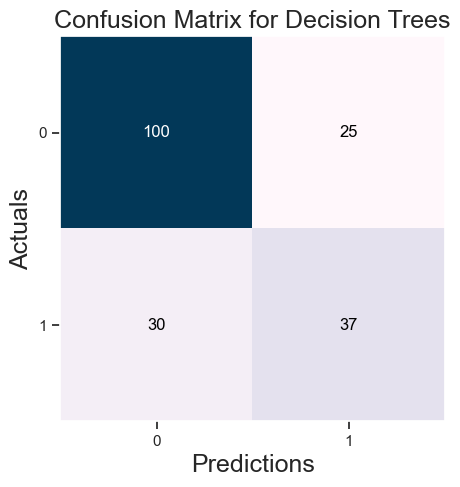

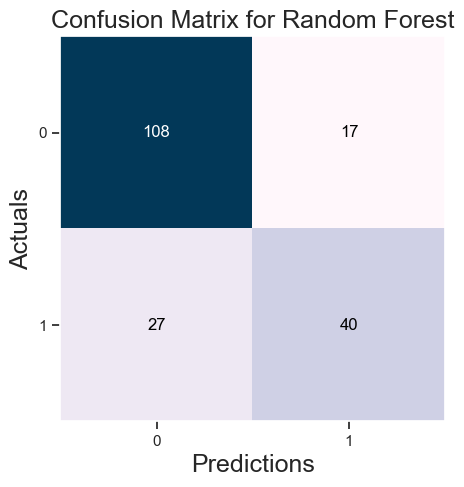

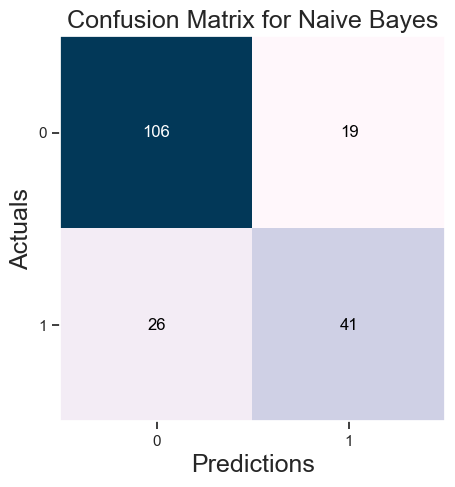

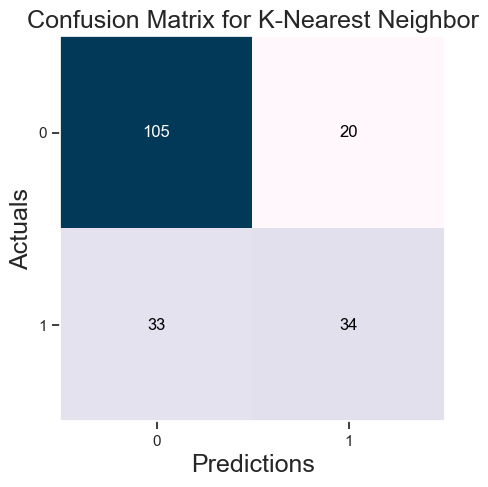

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_valid)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_valid)
    precision[key] = precision_score(predictions, y_valid)
    recall[key] = recall_score(predictions, y_valid)
    f1[key] = f1_score(predictions, y_valid)
    
    #Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_valid, predictions)
    
    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.PuBu)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix for {}'.format(key), fontsize=18)


df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

Berdasarkan hasil di atas:

* Model Random Forest memiliki skor akurasi tertinggi. Hal ini menunjukkan bahwa model memprediksi dengan tepat **77,6%** kasus diabetes dan non-diabetes yang sebenarnya.

* Model Random Forest memiliki skor presisi tertinggi kedua, menunjukkan bahwa **59,7%** hasil adalah relevan.

* Model Random Forest mendapatkan skor penarikan tertinggi, yang menyiratkan bahwa model tersebut secara akurat mengidentifikasi **71,4%** dari semua hasil yang relevan.

* Model Random Forest mencapai skor F1 tertinggi, **0,65**. Skor F1 berguna saat berhadapan dengan kelas yang tidak seimbang. Artinya model Random Forest memiliki false positive dan false negative paling sedikit dibandingkan dengan model lainnya.

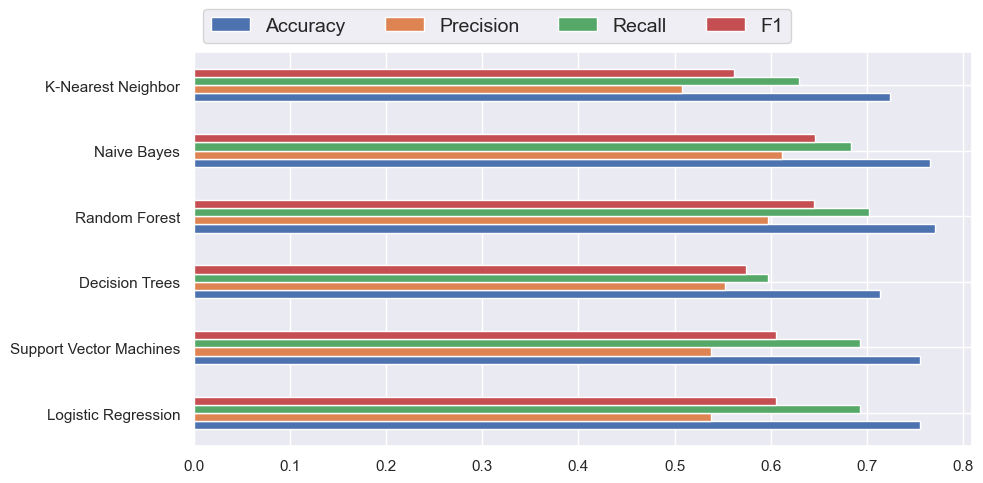

In [22]:
# Untuk membandingkan model menggunakan diagram batang
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

# **Kesimpulan**

Model Random Forest adalah model yang lebih baik untuk menentukan apakah seorang pasien wanita menderita diabetes